In [1]:
!pip install pandas matplotlib

  Using cached pandas-2.3.3-cp310-cp310-macosx_11_0_arm64.whl.metadata (91 kB)
  Using cached numpy-2.2.6-cp310-cp310-macosx_14_0_arm64.whl.metadata (62 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached contourpy-1.3.2-cp310-cp310-macosx_11_0_arm64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pillow-12.0.0-cp310-cp310-macosx_11_0_arm64.whl.metadata (8.8 kB)
Using cached pandas-2.3.3-cp310-cp310-macosx_11_0_arm64.whl (10.8 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 20.3 MB/s  0:00:00 eta 0:00:01
Using cached contourpy-1.3.2-cp310-cp310-macosx_11_0_arm64.whl (253 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 31.6 MB/s  0:00:00
Using cached numpy-2.2.6-cp310-cp310-macosx_14_0_arm64.whl (5.3 MB)
Using cached pillow-12.0.0-cp310-cp310-macosx_11_0_arm64.wh

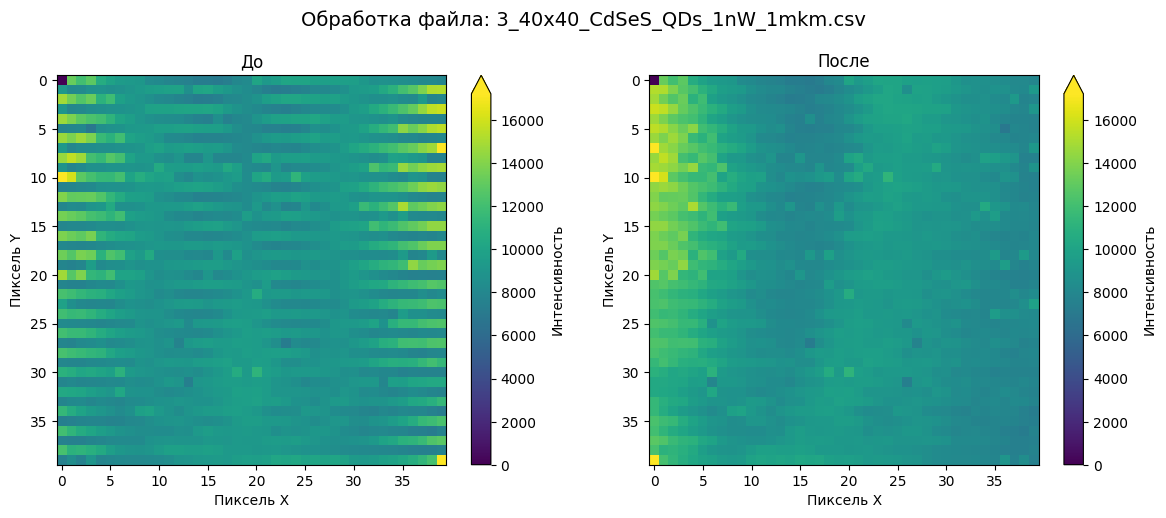

Файл '3_40x40_CdSeS_QDs_1nW_1mkm.csv' обработан и сохранен в 'corrected_images/3_40x40_CdSeS_QDs_1nW_1mkm_corrected.png'

Пакетная обработка завершена.


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import os

def process_and_visualize_scan(file_path, output_dir='corrected_images', display_plot=False):
    """
    Обрабатывает один CSV-файл: исправляет артефакт сканирования,
    строит сравнительные изображения и сохраняет результат в PNG.
    """
    try:

        if not os.path.exists(file_path):
            print(f"Файл не найден: {file_path}, пропуск.")
            return

        data = np.loadtxt(file_path)

       
        corrected_data = data.copy()
       
        for i in range(1, corrected_data.shape[0], 2):
            corrected_data[i] = corrected_data[i, ::-1]

        
        vmin = np.min(data)
        vmax = np.percentile(data, 99.9)
        if vmax <= vmin:  
            vmax = vmin + 1


        fig, axes = plt.subplots(1, 2, figsize=(12, 5))
        fig.suptitle(f'Обработка файла: {os.path.basename(file_path)}', fontsize=14)


        axes[0].set_title('До')
        im1 = axes[0].imshow(data, cmap='viridis', vmin=vmin, vmax=vmax)
        fig.colorbar(im1, ax=axes[0], label='Интенсивность', extend='max')

        axes[1].set_title('После')
        im2 = axes[1].imshow(corrected_data, cmap='viridis', vmin=vmin, vmax=vmax)
        fig.colorbar(im2, ax=axes[1], label='Интенсивность', extend='max')

        for ax in axes:
            ax.set_xlabel('Пиксель X')
            ax.set_ylabel('Пиксель Y')
        
        plt.tight_layout(rect=[0, 0, 1, 0.95])


        if not os.path.exists(output_dir):
            os.makedirs(output_dir)
        
        base_name = os.path.splitext(os.path.basename(file_path))[0]
        save_path = os.path.join(output_dir, f"{base_name}_corrected.png")
        plt.savefig(save_path, dpi=150, bbox_inches='tight')

        if display_plot:
            plt.show()

        plt.close(fig)
        
        print(f"Файл '{file_path}' обработан и сохранен в '{save_path}'")

    except Exception as e:
        print(f"Не удалось обработать файл '{file_path}'. Ошибка: {e}")


if __name__ == '__main__':
    input_file_list = 'input.txt'
    if not os.path.exists(input_file_list):
        print(f"Файл '{input_file_list}' не найден. Создаю пример...")
        with open(input_file_list, 'w') as f:
            f.write("3_40x40_CdSeS_QDs_1nW_1mkm.csv\n")

    
    with open(input_file_list, 'r') as f:
        
        filenames = [line.strip() for line in f if line.strip()]
    for i, filename in enumerate(filenames):
        process_and_visualize_scan(filename, display_plot=(i == 0))

    print("\nПакетная обработка завершена.")